Before getting started, we need to get access to the data. To do so, we clone a gitlab repository containing the data. It will make the data available in this Colab in the folder `data`.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm # Getting acces to statistical models
import statsmodels.formula.api as smf # A convenience interface for specifying models using formula strings and DataFrames
import scipy.stats as stats

import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn-white')

# 3.7 Exercises: Applied

You will work on applied exercises 8, 9, 13, and 14

## Exercise 8

This question involves the use of simple linear regression on the Auto data set.

In [7]:
auto2 = pd.read_csv('../data/islr_data/Auto.csv', na_values=['?'])
auto2.dropna(axis=0, inplace=True)

# Showing the types of the predictors
auto2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### 8a: Simple linear regression
Use the `smf.ols(...).fit()` function to perform a simple linear regression with 'mpg' as the response and 'horsepower' as the predictor. Use the summary() function to print the results. Comment on the output. For example:
* Is there a relationship between the predictor and the re- sponse?
* How strong is the relationship between the predictor and the response?
* Is the relationship between the predictor and the response positive or negative?
* What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [25]:
regr_data = auto2[["mpg", "horsepower"]]
fitted = smf.ols(formula="mpg ~ horsepower", data=regr_data).fit()

In [29]:
fitted.summary()
# there is a relationship between predictor and response
# the relationship is strong with a highly significant F and fairly high R^2
# the relationship is positive

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           7.03e-81
Time:                        14:03:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
fitted.predict(exog={"horsepower":98})
fitted.get_prediction(exog={"horsepower":98}).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


### 8b: Plot
Plot the response and the predictor. Use the function `plot_data_and_model()` that we defined in the Lab section to display the data and the fitted model.

Text(0, 0.5, 'fitted values')

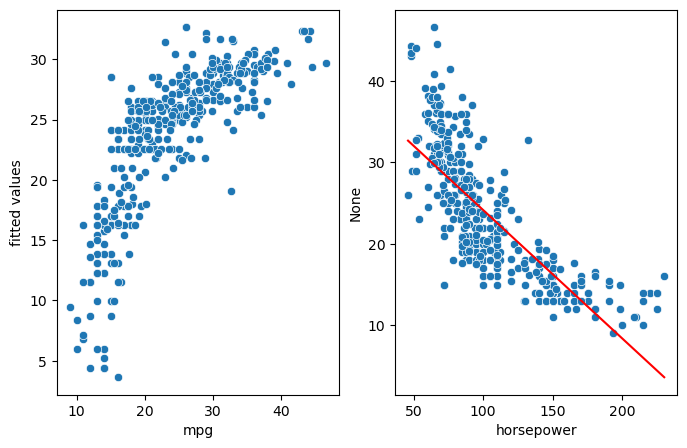

In [115]:
yhat = fitted.predict(auto2["horsepower"])
fig, axes = plt.subplots(1,2,figsize=(8,5))
fig = sns.lineplot(x=auto2["horsepower"], y=yhat, ax=axes[1], color = "r")
sns.scatterplot(x=auto2["horsepower"], y=auto2["mpg"], ax=axes[1])
g = sns.scatterplot(x=auto2["mpg"], y=yhat, ax=axes[0])
g.set_ylabel("fitted values")

### 8c: Diagnostic plots
Use the function `diagnostics_plots()` defined in the Lab section to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [97]:
def diagnostics_plots(lm):
  """
  Plots the four diagnostic plots for lm() output.
  1) Residuals vs Fitted
  2) Normal Q-Q
  3) Scale-Location
  4) Residuals vs Leverage
  """

  fitted_values = lm.fittedvalues
  residuals = lm.resid
  s_residuals = lm.resid_pearson
  #s_residuals = lm.get_influence().resid_studentized_external

  fig, axes = plt.subplots(2, 2, figsize=(8, 8))

  # Plot 1: Residuals vs fitted
  sns.regplot(x=fitted_values, y=residuals, ax=axes[0, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[0, 0].set_xlabel("Fitted Values", fontsize=15)
  axes[0, 0].set_ylabel("Residuals", fontsize=15)
  axes[0, 0].set_title('Residuals vs fitted', fontsize=15)
  axes[0, 0].grid()

  # Plot 2: Standardized residuals
  sm.qqplot(residuals, ax=axes[0, 1],fit=True, line="45", color=sns.color_palette()[0], marker='.')
  axes[0, 1].set_xlabel("Theoretical Quantiles", fontsize=15)
  axes[0, 1].set_ylabel("Studentized residuals", fontsize=15)
  axes[0, 1].set_title('Normal Q-Q', fontsize=15)
  axes[0, 1].grid()

  # Plot 3: Scale-Location
#  sns.regplot(x=fitted_values, y = np.sqrt(s_residuals), ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  sns.regplot(x=fitted_values, y = s_residuals, ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[1, 0].set_xlabel('Fitted values', fontsize=15)
#  axes[1, 0].set_ylabel('sqrt( Studentized residuals )', fontsize=15)
  axes[1, 0].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 0].set_title('Scale-Location', fontsize=15)
  axes[1, 0].grid()

  # Plot 4: Influence Plot
  sm.graphics.influence_plot(lm, ax=axes[1,1], criterionstr='Cooks', size = 1)
  axes[1, 1].set_xlabel('h leverage', fontsize=15)
  axes[1, 1].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 1].set_title('Residuals vs leverage', fontsize=15)
  axes[1,1].grid()

  plt.tight_layout()
  plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/home/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


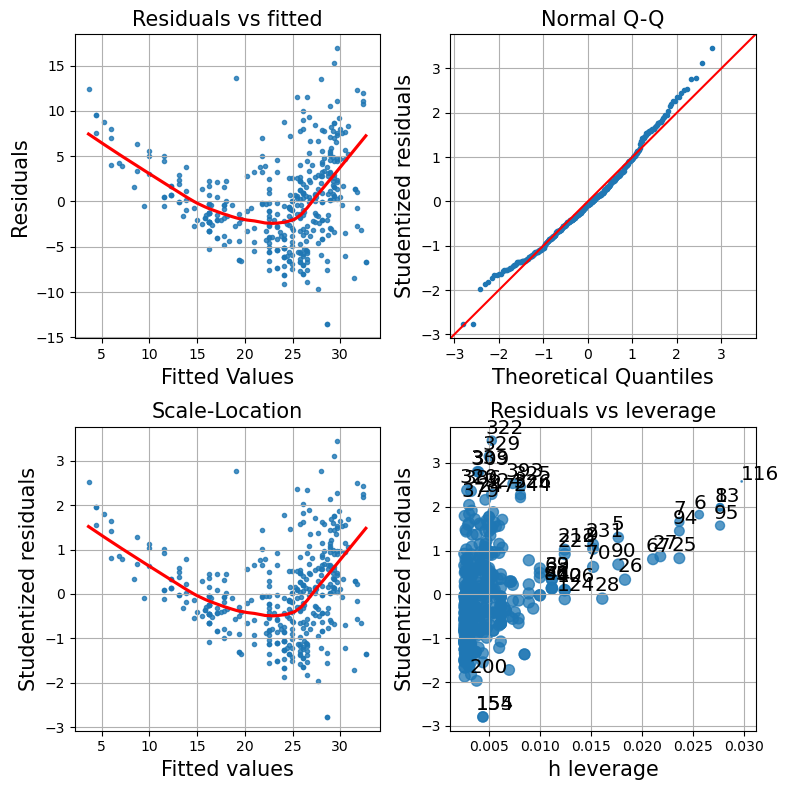

In [116]:
diagnostics_plots(fitted)
# residual vs fitted are not homoscedastic, however values are normally distributed.
# additionally there are some outliers 

## Exercise 9

This question involves the use of multiple linear regression on the Auto data set.

### 9a: Pair-wise plots
Produce a pair-wise plots with scatterplots of all of the variables in the data set.

In [120]:
auto_n = auto2.select_dtypes(include="number")

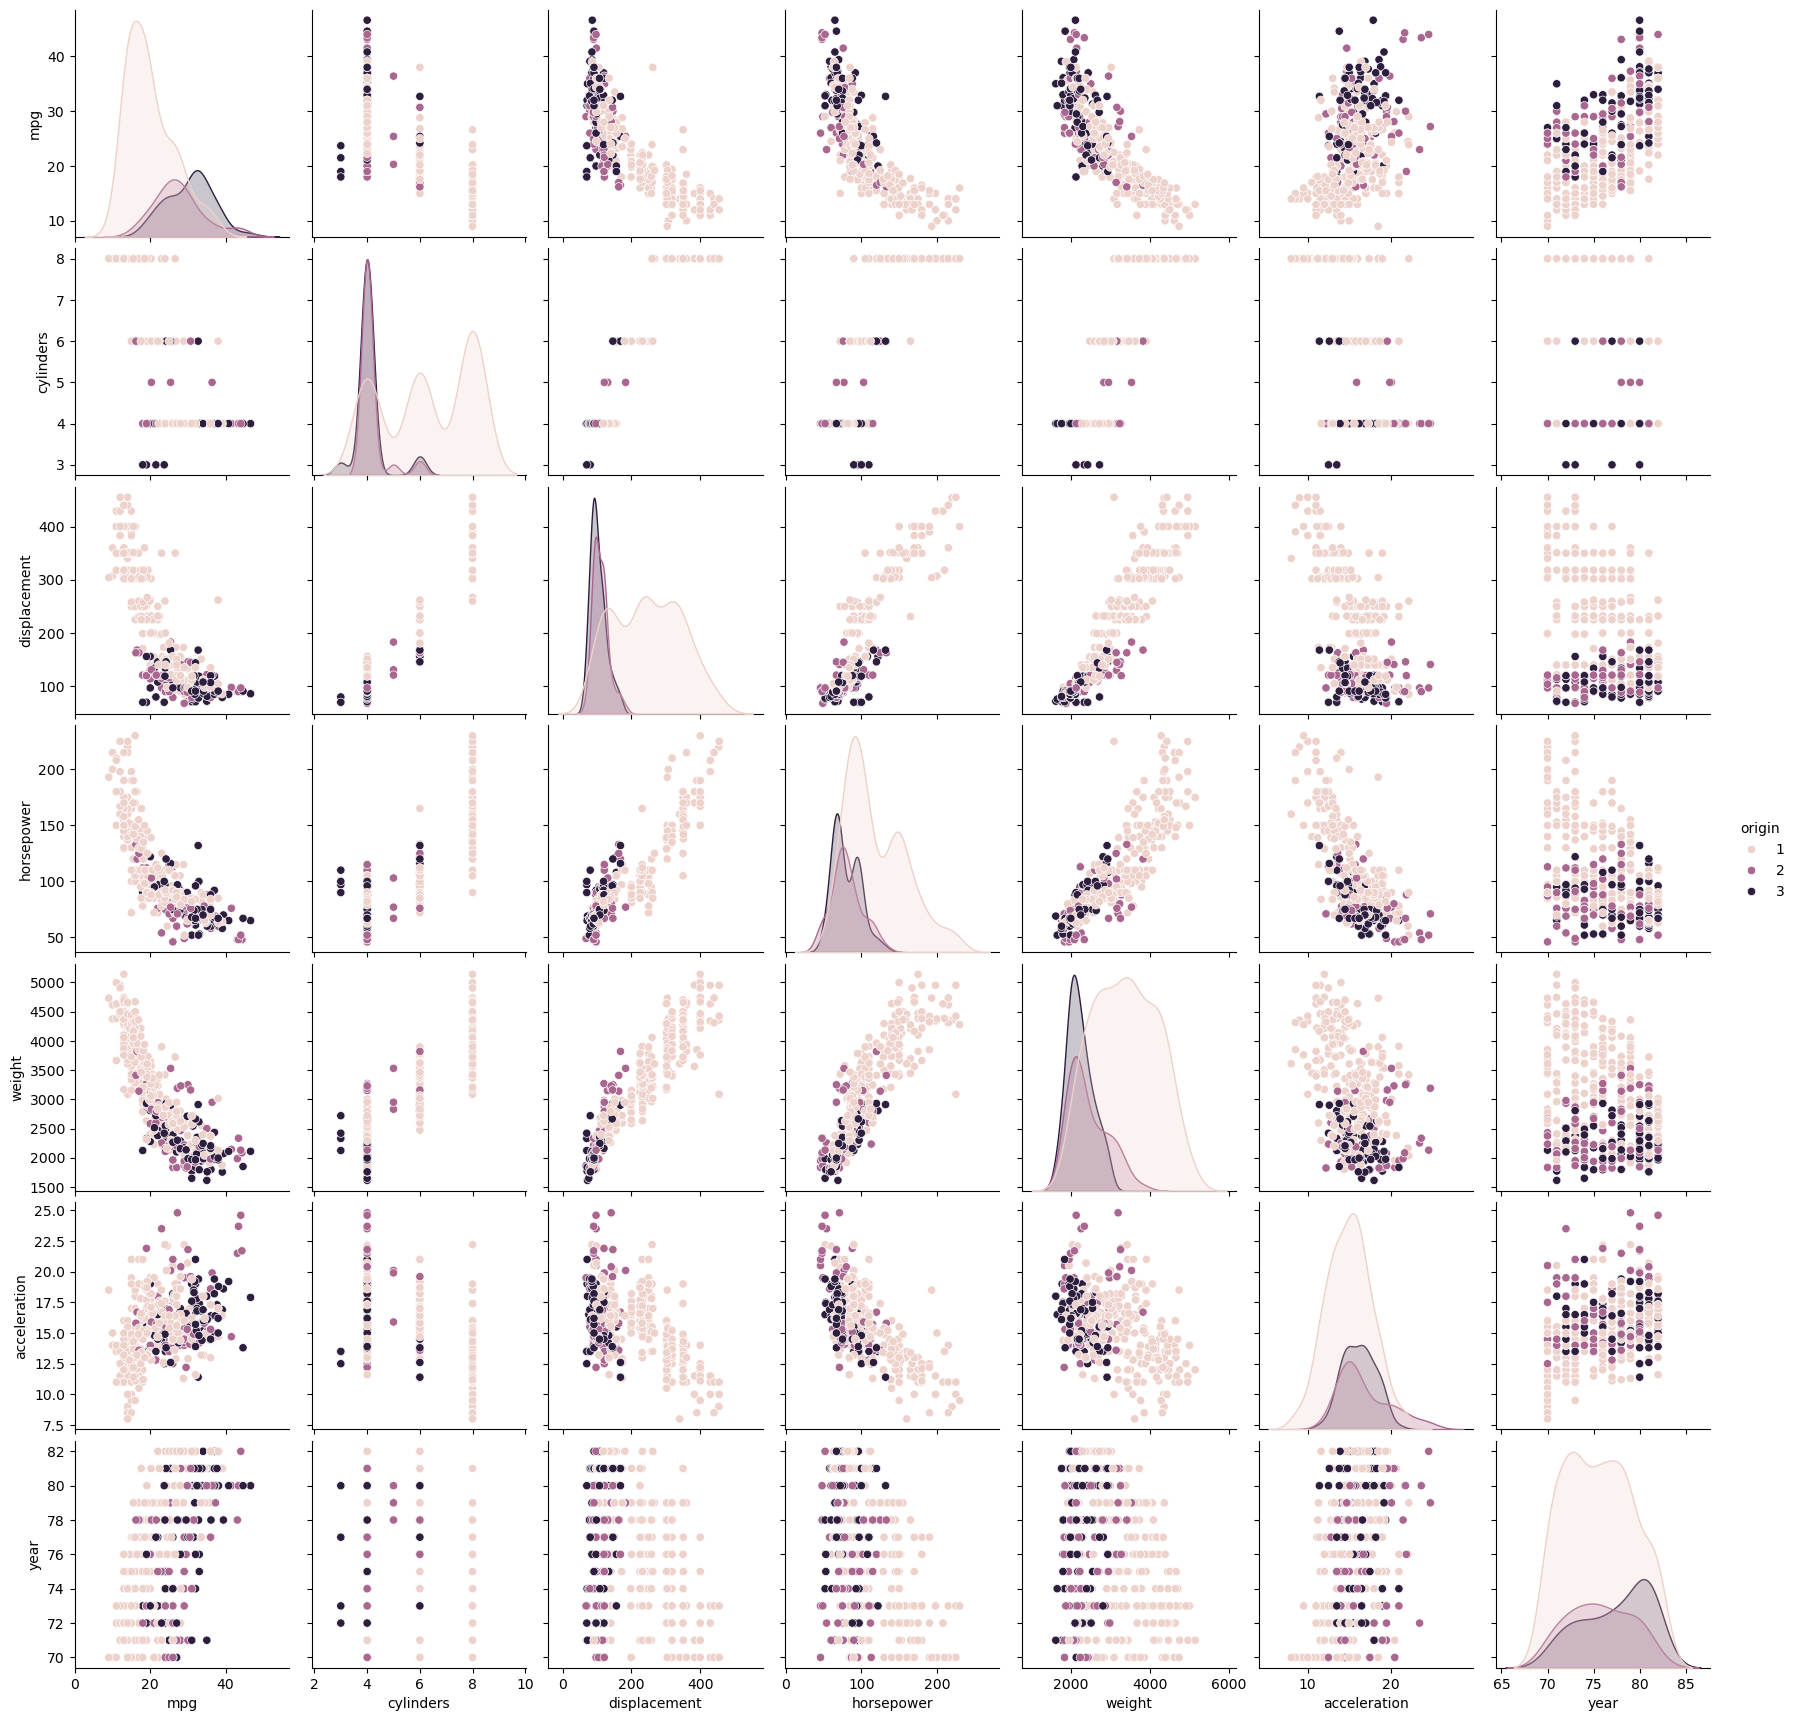

In [125]:
sns.pairplot(auto_n, hue="origin")

### 9b: Correlation

Compute the matrix of correlations between the variables using the function `auto.corr()`. Indentify pairs of variables that have high correlation (<-0.8 or >0.8). Look at the pair plots to see if you can see these strong correlations in the scatter plots.

In [129]:
auto_n.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### 9c: Multiple-linear regression
Use `smf.ols(...).fit()` to perform a multiple linear regression with 'mpg' as the response and all other variables except name as the predictors. 

Use the `summary()` function to print the results. Comment on the output. For instance:
* Is there a relationship between the predictors and the response?
* Which predictors appear to have a statistically significant relationship to the response?
* What does the coefficient for the year variable suggest?

In [143]:
def formula(df, independent, exclude=[]):
    cols = df.columns.values.tolist()
    cols.remove(independent)
    cols = [x for x in cols if x not in exclude]
    return independent + " ~ " + " + ".join(cols)

fitted=smf.ols(formula(auto2, "mpg", ["name"]), auto2).fit()

In [147]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.04e-139
Time:                        22:49:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 9d: Diagnostic plots
Use the 'diagnostics_plots()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

###9e: Interaction temrs
Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

/opt/homebrew/Caskroom/miniconda/base/envs/home/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


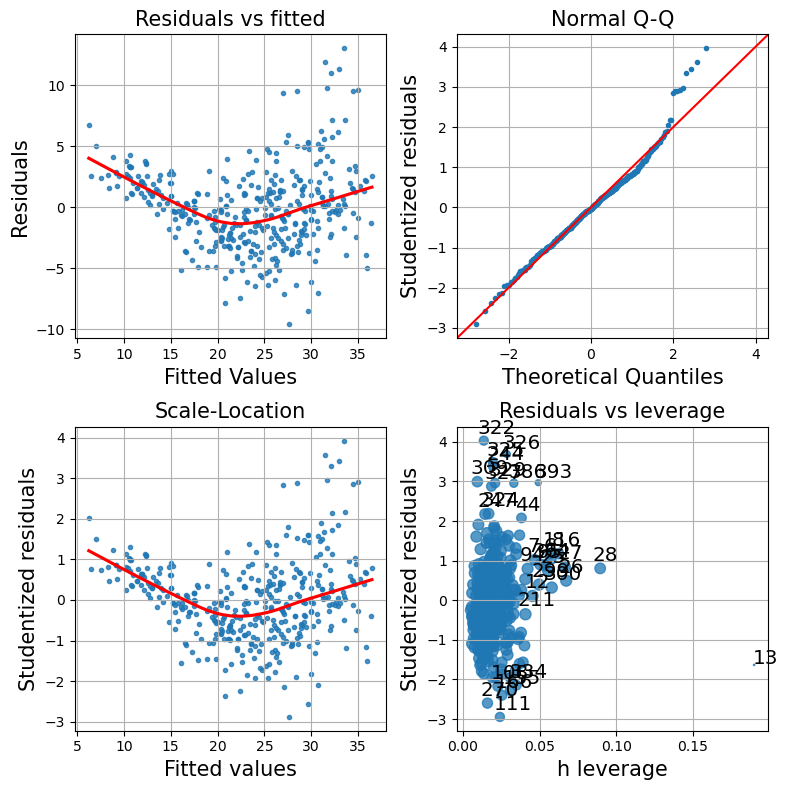

In [148]:
diagnostics_plots(fitted)

### 9f: Log, sqrt and squared terms
Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

## Exercise 13

In this exercise you will create some simulated data and will fit simple linear regression models to it. 

### 13a: Create a random X
Using the function `x = np.random.randn(100)`, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

### 13b :Adding noise
Also create a vector, `eps`, containing 100 observations drawn from a N(0,0.25) distribution, a normal distribution with mean zero and variance 0.25. You can use `0.25 * np.random.randn(100)`.

### 13c: Generating a response
Using `x` and `eps`, generate a response vector `y` according to the model

$Y =−1 + 0.5X + \epsilon$

What is the length of the vector y? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

###13c-ii: Making a pandas data frame
To ease further processing of the data that we just made, we are going to put it in a pandas dataframe. Run the code below to do so:

In [ ]:
my_data = pd.DataFrame({'x':x, 'y':y})

###13d: Scatterplot
Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

### 13e: Linear model
Fit a least squares linear model to predict 'y' using 'x'. Comment on the model obtained. How do the estimated $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to the real $\beta_0$ and $\beta_1$?

###13f: Scatterplot and model fit
Display the least squares line on the scatterplot obtained in (d) using `plot_data_and_model()`.

### 13g: Using a quadratic term in the model
Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

###13h: Repeating the analysis with less noise
Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model to generate the response, $Y =−1 + 0.5X + \epsilon$, should remain the same. You can do this by decreasing the vari- ance of the normal distribution used to generate the error term `eps` in (b). Describe your results.

### 13i: Repeating the analysis with more noise
Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

###13j: Confidence intervals on the coefficients
What are the confidence intervals for $\hat{\beta_0}$ and $\hat{\beta_1}$ based on the original data set, the noisier data set, and the less noisy data set for the linear model? Comment on your results.

###13k: For a non-linear dataset
Repeat (a)-(g), but now, createa a non-linear response using:
$Y = -2 + 0.5X + 0.2X^2 + \epsilon$

where $\epsilon \sim N(0,0.25)$, so drawn from a normal distribution with standard deviation 0.25. Also show the fitted quadratic model using `plot_data_and_model()`.

How does the quadratic model now compare to the linear model? Also perform an ANOVA to see if the quadratic model significantly fits the data better than the linear model

## Exercise 14
This problem focuses on the **collinearity** problem.

###14a: Dataset with collinearity
Run the code below:
The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [ ]:
x1 = np.random.random(100)
x2 = 0.5*x1 + 0.1*np.random.randn(100)
eps = np.random.randn(100)
y = 2 + 2*x1 + 0.3*x2 + eps
my_data = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})

###14b: Correlation
What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

###14c: Fitting a multiple linear model model
Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$?
How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1=0$? How about the null hypothesis $H_0 : \**beta_2**=0$?

###14d: Fitting a simple linear model using x1
Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1=0$

###14e: Simple linear regression using x2
Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1=0$?

###14f: Reflect on (c)-(e)
Do the results obtained in (c)–(e) contradict each other? Explain your answer.

###14g: Adding an outlier observation
Now suppose we obtain one additional observation, which was unfortunately mismeasured. You can add the observation with the code below.

Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [ ]:
my_data2 = my_data.append({'y':6, 'x1':0.1, 'x2':0.8}, ignore_index=True)
my_data2